<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/2.%20%D0%A0%D0%B5%D1%88%D0%B0%D1%8E%D1%89%D0%B8%D0%B5%20%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%E2%84%964._%D0%A0%D0%B5%D1%88%D0%B0%D1%8E%D1%89%D0%B8%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Решающие деревья для решения задач классификации

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

## Получение данных

Будем работать с набором данных для задачи классификации - данные по сердечно сосудистым заболеваниям, довольно стандартный набор для изучения машинного обучения, но его нет в `sklearn'e`. Поэтому скачиваем данные со стороны, с google диска.

Ссылка на google drive: https://drive.google.com/file/d/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G


In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G' -O cardio.csv

--2023-10-10 13:42:17--  https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G
Resolving drive.google.com (drive.google.com)... 74.125.202.102, 74.125.202.139, 74.125.202.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.202.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/at4no6q4695dgt32i17cdlqd7rbg3ghi/1696945275000/14904333240138417226/*/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G?e=download&uuid=7f5fafa8-d357-4ab9-86b6-cd2d03fa4a03 [following]
--2023-10-10 13:42:18--  https://doc-00-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/at4no6q4695dgt32i17cdlqd7rbg3ghi/1696945275000/14904333240138417226/*/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G?e=download&uuid=7f5fafa8-d357-4ab9-86b6-cd2d03fa4a03
Resolving doc-00-c0-docs.googleusercontent.com (doc-00-c0-docs.googleusercontent.com)... 64.233.182.132, 2607:

В задаче предалагается предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован 3 групп признаков:

Объективные признаки:
- Возраст (в днях)
- Рост
- Вес
- Пол

Результаты измерения:

- Артериальное давление верхнее и нижнее
- Холестерин (три группы: норма, выше нормы, значительно выше нормы)
- Глюкоза (три группы: норма, выше нормы, значительно выше нормы)

Субъективные признаки (бинарные):

- Курение
- Употребление Алкоголя
- Физическая активность

In [ ]:
full_df = pd.read_csv('cardio.csv', ';')
full_df.head()

<ipython-input-4-0d2f7aa0dc1d>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  full_df = pd.read_csv('cardio.csv', ';')


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
full_features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = ['cardio']

In [ ]:
full_df['age'] = round(full_df['age'] / 365)

Чтобы более наглядно смотреть, как обучается дерево решений возьмем только 5 объектов и 2 признака.

In [ ]:
features = ['age', 'ap_hi']

In [ ]:
df = full_df[features + target]
df = df.head(5)
df

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


In [ ]:
X = df[features]
y = df[target]

## Что такое дерево решений?

С чем можно сравнить деревья решений? А их можно сравнить с игрой в "акинатор", "крокодил" или "стикеры".


Когда на стикере пишешь имя знаменитости/ название животного/персонажа из игры и т.д., а затем клеешь на лоб другу. Друг должен с помощью вопросов, на которые можно давать ответ только да или нет, догадаться, а кто же написан на стикере.

Если вы играете в стикеры с именем публичной личности, то самый первый и самый логичный вопрос будет связан с полом человека, потому что в среднем 50% мужчин, 50% женщин и одним вопросом "мой загаданный человек такого-то пола?" можно отсечь 50% вариантов, как неправильные ответы. А затем продолжить задавать вопросы, пока в конечном счете не дойдете до одного человека.

Так же ведут себя наши деревья решений, они задают вопросы к данным, разбивая на подвыборки, чтобы докопаться до истины

Так давайте обучем одно дерево решений с помощью sklearn'a.

Инициализируем его для задачи классификации и обучим на признаках (`X`) и целевой переменной (`y`). По признакам модель будет запоминать закономерности, которые больше влияют на наличие сердечно-сосудистого заболевания.

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, y)

DecisionTreeClassifier(random_state=1)

Теперь визуализируем наше обученное дерево решений. Из себя дерево решений представлет набор вопросов к данным.  Узлы (ноды), где как раз-таки находится вопрос - называются **вершинами**, в этом дереве у нас есть одна вершина, где хранится вопрос `ap_hi <= 120`.

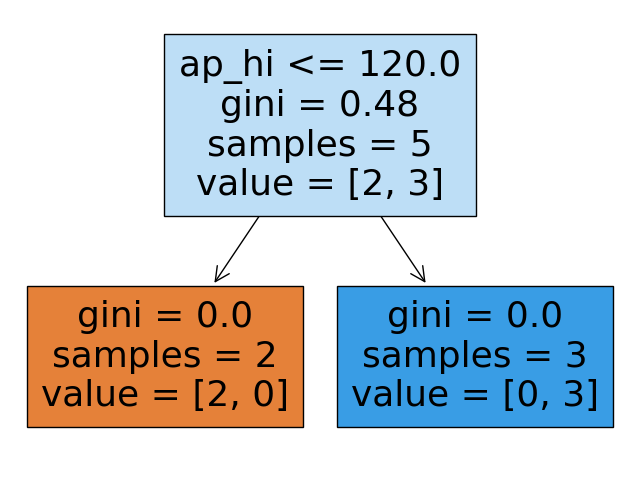

In [ ]:
from sklearn.tree import plot_tree


plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=features, filled=True);


По этому вопросу идет разбиение выборки на две подвыборки: на левую, где условие удовлетворяется (*верхняя цифра давления действительно меньше либо равна 120*) и на правую, где условие не удовлетворяетсся (*где давление больше 120*).

Тем самым получаем ещё два узла, которые уже именуются **листами**, благодаря ним будем получать финальное предсказание модели.

В **левом листе** у нас находится два объекта и они вдвоем 0 класса, значит любой объект, у которого давление будет меньше или равно 120 попадет в этот конечный узел и будет считаться 0 классом.

А в **правом листе** находится три объекта и они все имеют метку класс 1. А значит, если возьмем новый объект, спросим у него давление и оно окажется больше 120, то предскажем ему класс 1.

Левая подвыборка, где условие удовлетворяется

In [ ]:
df[df['ap_hi'] <= 120]

,age,ap_hi,cardio
0,50.0,110,0
4,48.0,100,0


Правая подвыборка, где условие не удовлетворяется

In [ ]:
df[~(df['ap_hi'] <= 120)]

,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


## Какие вопросы задает дерево решений?

В целом, смысл дерева поняли, теперь пора разобраться, как дерево решений понимает, какие вопросы нужно задавать.

In [ ]:
import numpy as np

In [ ]:
df

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


А на самом деле дерево действует в лоб и задает всевозможные вопросы, которые только можно задавать. Давайте приведем примеры вопросов.


### Вопросы с признаком age

Для начала с признаком возраста.

- age <= 50

Получаем две подвыборки, где слева 3 объекта, а справа 2.

In [ ]:
condition = df['age'] <= 50
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1


- age <= 55

Вот этот вопрос нелогичный, так как они никак наши данные не разбивает, а кладет все объекты в одну подвыборку, так что его не считаем за нормальный вопрос.

In [ ]:
condition = df['age'] <= 55
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio


- age <= 52

Получаем две подвыборки, слева 4 объекта, а справа 1.

In [ ]:
condition = df['age'] <= 52
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1


и остается только один вопрос, т.к. два последних объекта имеют одинаковое значение возраста
- age <= 48

Здесь разбиение 2 на 3.

In [ ]:
condition = df['age'] <= 48
display(df[condition], df[~condition])

,age,ap_hi,cardio
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1


Резюмируем по признаку возраста. Получили 3 валидных вопроса

### Вопросы с признаком ap_hi

Дальше с признаком ap_hi.

- ap_hi <= 110

Слева 2 объекта, справа 3

In [ ]:
condition = df['ap_hi'] <= 110
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


- ap_hi <= 100

Слева 1 объект, справа 4

In [ ]:
condition = df['ap_hi'] <= 100
display(df[condition], df[~condition])

,age,ap_hi,cardio
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


- ap_hi <= 140

Слева 4 объекта, справа 1

In [ ]:
condition = df['ap_hi'] <= 140
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
4,48.0,100,0


,age,ap_hi,cardio
3,48.0,150,1


- ap_hi <= 130

Слева 3 объекта, справа 2

In [ ]:
condition = df['ap_hi'] <= 130
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
2,52.0,130,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
3,48.0,150,1


И последний вопрос с признаком ap_hi

- ap_hi <= 150

Слева 5 объектов, справа 0, вопрос неправильный, потому что никакого раззбиения он нам не дает, так что его за вопрос не считаем.

In [ ]:
condition = df['ap_hi'] <= 150
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio


Итого, 3 вопроса про возраст и 4 вопроса про давление. Как из 7 вопросов найти самый успешный, а тут стоит поговорить про функционал качества, который будет сравнивать успешность разбиений.

## Как дерево решений обучается?

### Прирост информации

За функционал качества при работе с деревом решений принимается **прирост информации** (information gain):

$$Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r}),$$


где $X_{m}$ - множество объектов, попавших в вершину на данном шаге, $X_{l}$ и $X_{r}$ - множества, попадающие в левое и правое поддерево после разбиения. $H(X)$ - _критерий информативности_. Он показывает неопределенность в данных, хаус, нечистоту.

Задача обучения состоит в его минимизации и, соответственно, максимизации прироста информации.

Ещё критерии информативности нужно нормировать - домножить на долю объектов, ушедших в соответствующее подмножество. Например, если у нас множество в узле разбилось на два подмножества размером в 9990 объектов и 10 объектов, но при этом в первом подмножестве все объекты будут принадлежать к одному классу, а во втором - к разным, то в целом разбиение будет считаться хорошим, так как подавляющее большинство отсортировано правильно.

В деревьях для задачи классификации используются два основных критерия информативности для подсчета ошибки, которые оперируют вероятностями появления каждого класса:


Обозначим через $p_{k}$ долю объектов класса $k$ в выборке $X$:

$$p_{k} = \frac{1}{|X|}\sum_{i\in X}[y_{i} = k].$$



**Критерии информативности** для задачи классификации:
- _Энтропийный критерий_ или _энтропия Шеннона_ :

$$H(X) = - \sum^{K}_{k=1}p_{k}\text{log}_{2}p_{k}.$$

Минимум энтропии (0) достигается, когда все объекты относятся к одному класссу, а максимум - при равномерном распределении. В формуле полагается, что $0\text{log}_{2}0=0.$

- _Критерий Джини_ или _индекс Джини_:

$$H(X) = \sum^{K}_{k=1}p_{k}(1-p_{k}) = 1 - \sum_{k=1}^K{p_k^2} ,$$

где $K$ - количество классов в наборе данных $X$.

Его минимум (0) достигается, когда все объекты относятся к одному классу, а максимум - при равном содержании объектов всех класов.

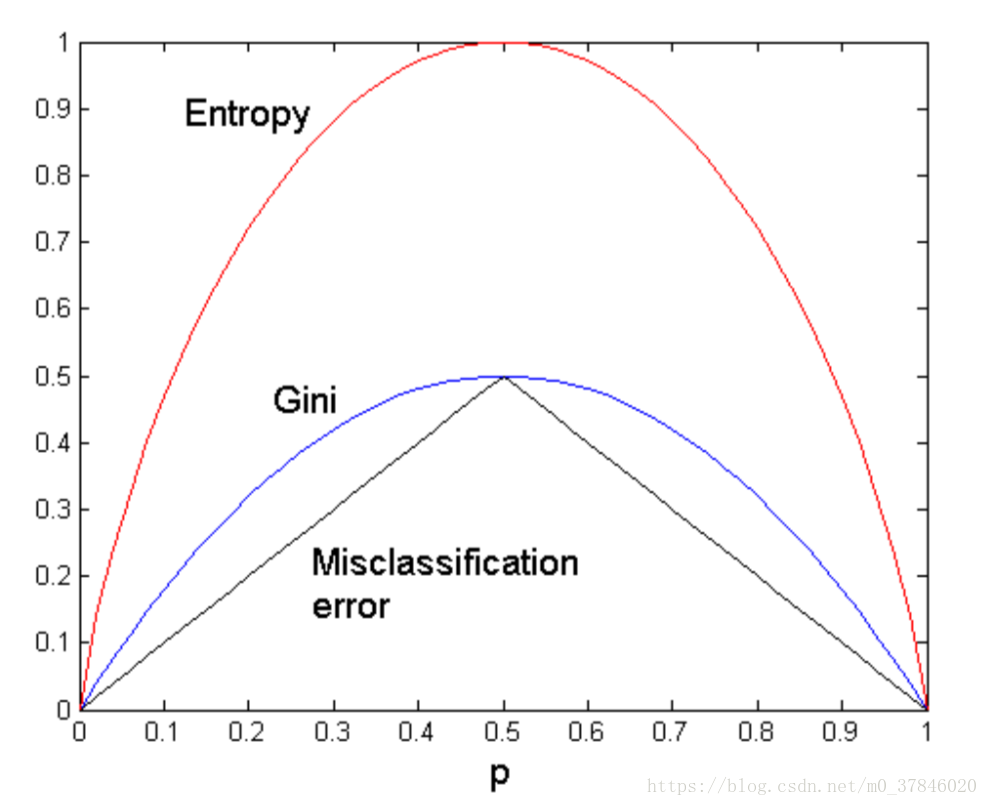



### Энтропия Шеннона

In [ ]:
df

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


У нас всё еще есть выборка из 5 людей. У двух из них нет заболевания (класс 0), а у трех оно имеется (класс 1). И мы хотим с помощью дерева решений найти такое разбиение, которое наиболее качественно разбивает выборку на две подвыборки, при этом в одной должны быть люди только с 0 классом, а во второй должны быть только люди с 1 классом.

Следить за таким порядком в подвыборках будет Энтропия или критерий Джини. Они позволяют посчитать количество неопределенности в наших данных.

Давайте разберемся с энтропией, тк критерий Джини мы рассмотрели ранее (на большой выборке они работают практически аналогичным образом).


$$H(X) = - \sum^{K}_{k=1}p_{k}\text{log}_{2}p_{k}.$$




Начнем с подсчета энтропии в исходной выборке из 5 объектов. У нас два объекта 0 класса и три объекта 1 класса.

In [ ]:
class_0 = 2
class_1 = 3
total = class_0 + class_1

p_0 = class_0 / total
p_1 = class_1 / total
p_0, p_1

(0.4, 0.6)

Имеем вероятность быть 0 классом 0.4:
$$p_0 = \frac{2}{5} = 0.4$$

А вероятность быть 1 классом равняется 0.6
$$p_1 = \frac{3}{5} = 0.6$$

А значит в данной системе очень много неопределенности, ведь практически с вероятностью 50/50 объект может быть или 0 классом или 1. Создавая модель дерево решений, мы хотим задавать такие вопросы, которые будут отделять 1 класс от 0 и класть в отдельные подвыборки.

Давайте с такими вероятностями посчитаем энтропию.

In [ ]:
entropy_start = - (p_0 * np.log2(p_0) + p_1 * np.log2(p_1))
entropy_start

0.9709505944546686

Она получается довольно высокой (напомню, что в идеале критерий информативности энтропия должна стремиться к нулю), а значит раз энтропия высокая, то и определенности пока что нет.

Значит нужно разбивать выборку до этой самой определенности.

Благо список вопросов, которые можем тестировать, уже составляли.

Все наши найденные значения прироста информации будем записывать в таблицу.

In [ ]:
results = pd.DataFrame(columns=['feature', 'value', 'IG'])
results

,feature,value,IG


#### Вопросы с признаком age

##### age <= 50

Получаем две подвыборки, где слева 3 объекта, а справа 2.

In [ ]:
condition = df['age'] <= 50
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1


###### Левая подвыборка

Сначала считаем вероятности в левой подвыборке

In [ ]:
df[condition]

,age,ap_hi,cardio
0,50.0,110,0
3,48.0,150,1
4,48.0,100,0


In [ ]:
class_0 = 2
class_1 = 1
total = class_0 + class_1

p_0 = class_0 / total
p_1 = class_1 / total
p_0, p_1

(0.6666666666666666, 0.3333333333333333)

Имеем вероятность быть 0 классом в левой ветки:
$$p_0 = \frac{2}{3} = 0.667$$

А вероятность быть 1 классом равняется
$$p_1 = \frac{1}{3} = 0.334$$

А значит в данной ветке определенности побольше, чем было в исходной, ведь теперь с большей вероятностью объект может быть 0 классом и меньшей 1.

Объединяем вероятности в энтропию и она имеет значение меньше, чем у исходной энтропии (там было 0.97), но и это значение всё равно еще очень далеко от заветного 0.

In [ ]:
entropy_left = - (p_0 * np.log2(p_0) + p_1 * np.log2(p_1))
entropy_left

0.9182958340544896

###### Правая подвыборка

Теперь считаем вероятности в правой подвыборке

In [ ]:
df[~condition]

,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1


In [ ]:
class_0 = 0
class_1 = 2
total = class_0 + class_1

p_0 = class_0 / total
p_1 = class_1 / total
p_0, p_1

(0.0, 1.0)

Имеем вероятность быть 0 классом в правой ветке:
$$p_0 = \frac{0}{2} = 0$$

А вероятность быть 1 классом равняется
$$p_1 = \frac{2}{2} = 1$$

А значит в данной ветке определено всё, здесь находятся объекты только первого класса, нулевого класса здесь нет - вот это для нас самая лучшая ситуация.

Объединяем вероятности в энтропию (при этом считаем, что $0\text{log}_{2}0=0$ и считаем только второе слагаемое). Получили значение равное 0 - это идеальное значения, которое говорит нам, что нет неопределенности, нет энтропии.

In [ ]:
entropy_right = - p_1 * np.log2(p_1)
entropy_right

-0.0

Получили в левой подвыборке энтропию 0.91, а во второй 0, теперь можем объединить эти значения в прирост информации.

###### Прирост информации

$$Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r})$$


In [ ]:
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1


При этом помним, что энтропии в подвыборках нужно нормировать. В левой оказалось 3 объекта из 5 исходных, а в правой их оказалось 2 тоже из 5.

In [ ]:
IG = entropy_start - (3/5) * entropy_left - (2/5) * entropy_right
IG

0.4199730940219749

Итого прирост информации для вопроса age <= 50 равняется 0.41, чем это значение больше, тем лучше. Мы же хотим получить как можно больше полезной информации за счет разбиения данных на подвыборки.

Давайте запишем эти результаты в таблицу

In [ ]:
results = results.append({
    'feature': 'age',
    'value': 50,
    'IG': IG
}, ignore_index=True)

results

<ipython-input-38-9c9cf7546a1c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973


##### age <= 55
Едем дальше, но вспомнинаем, что этот вопрос был некорректным, ведь он не делал разбиения.

In [ ]:
condition = df['age'] <= 55
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio


##### age <= 52

Получаем две подвыборки, слева 4 объекта, а справа 1.

In [ ]:
condition = df['age'] <= 52
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1


###### Левая подвыборка

Сначала считаем вероятности в левой подвыборке

In [ ]:
df[condition]

,age,ap_hi,cardio
0,50.0,110,0
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


In [ ]:
class_0 = 2
class_1 = 2
total = class_0 + class_1

p_0 = class_0 / total
p_1 = class_1 / total
p_0, p_1

(0.5, 0.5)

Имеем вероятность быть 0 классом в левой ветки:
$$p_0 = \frac{2}{4} = 0.5$$

А вероятность быть 1 классом равняется
$$p_1 = \frac{2}{4} = 0.5$$

Имеем очень высокую неопределенность, 50/50 будет либо первый класс, либо нулевой.

Объединяем вероятности в энтропию и она единичная, хауса много, определенности нет.

In [ ]:
entropy_left = - (p_0 * np.log2(p_0) + p_1 * np.log2(p_1))
entropy_left

1.0

###### Правая подвыборка

Теперь считаем вероятности в правой подвыборке

In [ ]:
df[~condition]

,age,ap_hi,cardio
1,55.0,140,1


In [ ]:
class_0 = 0
class_1 = 1
total = class_0 + class_1

p_0 = class_0 / total
p_1 = class_1 / total
p_0, p_1

(0.0, 1.0)

И здесь тоже вероятность быть 0 классом в правой ветке нулевая:
$$p_0 = \frac{0}{2} = 0$$

А вероятность быть 1 классом равняется
$$p_1 = \frac{2}{2} = 1$$

Здесь вообще один объект и он первого класса, значит здесь определенность высокая.

Считаем энтропию (при этом снова считаем, что $0\text{log}_{2}0=0$ и подсчитываем только второе слагаемое). Получили значение равное 0.

In [ ]:
entropy_right = - p_1 * np.log2(p_1)
entropy_right

-0.0

Получили в левой подвыборке энтропию 1, а во второй 0, теперь можем объединить эти значения в прирост информации.

###### Прирост информации

$$Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r})$$


In [ ]:
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1


Энтропию в подвыборках нормируем. В левой оказалось 4 объекта из 5 исходных, а в правой их оказалось 1 из 5.

In [ ]:
IG = entropy_start - (4/5) * entropy_left - (1/5) * entropy_right
IG

0.17095059445466854

Итого прирост информации для вопроса age <= 52 равняется 0.17, что меньше, чем прирост в вопросе с возрастом age <= 50.

Тоже запишем результат в таблицу

In [ ]:
results = results.append({
    'feature': 'age',
    'value': 52,
    'IG': IG
}, ignore_index=True)

results

<ipython-input-49-c1853df23e80>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951


##### age <= 48
и остается только один вопрос.

Здесь разбиение 2 на 3.

In [ ]:
condition = df['age'] <= 48
display(df[condition], df[~condition])

,age,ap_hi,cardio
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1


Сделаем две вспомогательные функции для подсчета энтропии и прироста информации.

In [ ]:
# Расчет энтропии

def entropy(labels):
    """
    на вход labels - целевые значения
    на выходе подсчитанная энтропия
    """
    labels = list(labels)

    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1

    #  расчет критерия
    ent = 0
    for label in classes:
        p = classes[label] / len(labels)
        ent += p * np.log2(p)

    return -ent

In [ ]:
# Расчет прироста

def gain(left_labels, right_labels, root_labels):

    # доля выборки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    IG = entropy(root_labels) - p * entropy(left_labels) - (1 - p) * entropy(right_labels)

    return IG

###### Прирост информации

Передаем наши целевые значения в подвыборках и исходной выборки в функция для подсчета прироста информации.

In [ ]:
IG = gain(df[condition]['cardio'], df[~condition]['cardio'], df['cardio'])
IG

0.01997309402197489

In [ ]:
display(df[condition], df[~condition])

,age,ap_hi,cardio
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1


Прирост информации для вопроса age <= 48 равняется 0.01, что совсем маленькое значение по сравнению с предыдущими.

Тоже запишем результат в таблицу

In [ ]:
results = results.append({
    'feature': 'age',
    'value': 48,
    'IG': IG
}, ignore_index=True)

results

<ipython-input-55-bb791fd25dfb>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951
2,age,48,0.019973


Резюмируем по признаку возраста. Получили 3 валидных вопроса и их три подсчитанные прироста информации.

#### Вопросы с признаком ap_hi

##### ap_hi <= 110

Слева 2 объекта, справа 3. Уже видим на моменте разбиения, что что-то интересное намечается, в одной выборке только 0, во второй только 1, идеальная определенность.

In [ ]:
condition = df['ap_hi'] <= 110
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


###### Прирост информации

Но проверим эти хорошие результаты и с помощью прироста информации. Передаем наши целевые значения в подвыборках и исходной выборки в функция для подсчета прироста информации.

In [ ]:
IG = gain(df[condition]['cardio'], df[~condition]['cardio'], df['cardio'])
IG

0.9709505944546686


Прирост информации для вопроса ap_hi <= 110 равняется 0.97, что равняется исходной стартовой энтропии среди всех объектов. Это значит, что этим вопросом мы получили всю нужную для нас информацию.

Запишем этот идеальный результат в таблицу.

In [ ]:
results = results.append({
    'feature': 'ap_hi',
    'value': 110,
    'IG': IG
}, ignore_index=True)

results

<ipython-input-58-eec9138c3fcd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951
2,age,48,0.019973
3,ap_hi,110,0.970951


#####  ap_hi <= 100

Слева 1 объект, справа 4

In [ ]:
condition = df['ap_hi'] <= 100
display(df[condition], df[~condition])

,age,ap_hi,cardio
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


###### Прирост информации

In [ ]:
IG = gain(df[condition]['cardio'], df[~condition]['cardio'], df['cardio'])
IG

0.3219280948873623

Прирост информации для вопроса ap_hi <= 100 равняется 0.32, тоже неплохо, но вот с предудущим результатом походу уже ничего не сравнится.

Запишем результат в таблицу.

In [ ]:
results = results.append({
    'feature': 'ap_hi',
    'value': 100,
    'IG': IG
}, ignore_index=True)

results

<ipython-input-61-53b0c1ecf4b8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951
2,age,48,0.019973
3,ap_hi,110,0.970951
4,ap_hi,100,0.321928


##### ap_hi <= 140

Слева 4 объекта, справа 1

In [ ]:
condition = df['ap_hi'] <= 140
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
4,48.0,100,0


,age,ap_hi,cardio
3,48.0,150,1


###### Прирост информации

In [ ]:
IG = gain(df[condition]['cardio'], df[~condition]['cardio'], df['cardio'])
IG

0.17095059445466854

Ну уж совсем печальный прирост. При вопросе ap_hi <= 140 равняется 0.17.

Запишем этот идеальный результат в таблицу.

In [ ]:
results = results.append({
    'feature': 'ap_hi',
    'value': 140,
    'IG': IG
}, ignore_index=True)

results

<ipython-input-64-ca8f1e9b303d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951
2,age,48,0.019973
3,ap_hi,110,0.970951
4,ap_hi,100,0.321928
5,ap_hi,140,0.170951


##### ap_hi <= 130

Слева 3 объекта, справа 2

In [ ]:
condition = df['ap_hi'] <= 130
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
2,52.0,130,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
3,48.0,150,1


###### Прирост информации

In [ ]:
IG = gain(df[condition]['cardio'], df[~condition]['cardio'], df['cardio'])
IG

0.4199730940219749

Прирост информации для вопроса ap_hi <= 130 равняется 0.41.

In [ ]:
results = results.append({
    'feature': 'ap_hi',
    'value': 130,
    'IG': IG
}, ignore_index=True)

results

<ipython-input-67-98ef3883cdcb>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951
2,age,48,0.019973
3,ap_hi,110,0.970951
4,ap_hi,100,0.321928
5,ap_hi,140,0.170951
6,ap_hi,130,0.419973


##### ap_hi <= 150

И последний вопрос с признаком ap_hi


Слева 5 объектов, справа 0, вопрос неправильный, потому что никакого раззбиения он нам не дает, так что его за вопрос не считаем.

In [ ]:
condition = df['ap_hi'] <= 150
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio


Итого, 3 вопроса про возраст и 4 вопроса про давление. Можем вывести таблицу с приростами информации, но думаю своего победителя мы уже нашли.

In [ ]:
results

,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951
2,age,48,0.019973
3,ap_hi,110,0.970951
4,ap_hi,100,0.321928
5,ap_hi,140,0.170951
6,ap_hi,130,0.419973


Это вопрос ap_hi <= 110 - у него максимальный прирост информации из всевозможных вопросов, которые мы назадавали. Значит его и будем использовать для нашего дерева решений.

То, что мы с вами сделали - это ооочень маленькая часть всего построения дерева решений, мы нашли только один вопрос - а у деревьев их может быть десятки, сотни, тысячи и еще больше, зависит от сложности задачи.

И еще одно интересное замечание. Когда мы строили с вами дерево решений из sklearn'a, то самый лучший вопрос получался age <= 120, а у нас такого вопроса не было.

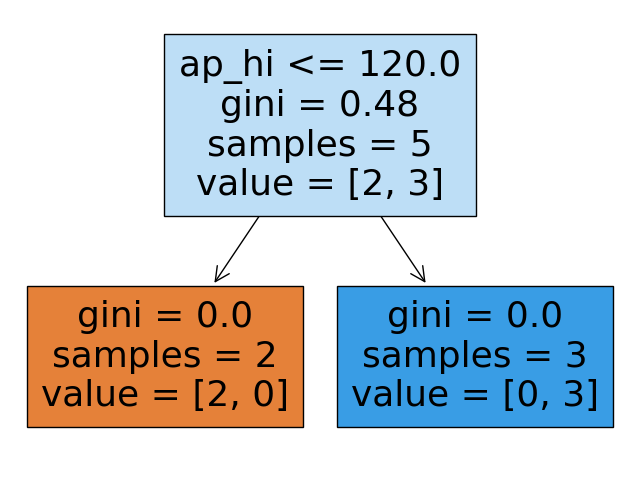

In [ ]:
plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=features, filled=True);

Это потому, что можно еще немного иначе задавать вопросы. Брать не буквально уникальные значения из признака, а среднее между уникальными отсортированными значениями.

In [ ]:
sorted(df['ap_hi'].unique())

[100, 110, 130, 140, 150]

И могли бы задавать такие вопросы

In [ ]:
display(
    f'ap_hi <= {(100 + 110) / 2}',
    f'ap_hi <= {(110 + 130) / 2}',
    f'ap_hi <= {(130 + 140) / 2}',
    f'ap_hi <= {(140 + 150) / 2}',
)

'ap_hi <= 105.0'

'ap_hi <= 120.0'

'ap_hi <= 135.0'

'ap_hi <= 145.0'

При этом разбиения мы будем получать такие же, как и при наших вопросах, к примеру, вопрос по такое методике ap_hi <= 105 (среднее между 100 и 110).

In [ ]:
condition = df['ap_hi'] <= 105
display(df[condition], df[~condition])

,age,ap_hi,cardio
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


Это тоже самое, что наш вопрос ap_hi <= 100.

In [ ]:
condition = df['ap_hi'] <= 100
display(df[condition], df[~condition])

,age,ap_hi,cardio
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


Так что можно находить лучшие вопросы:
1. через уникальные значения в признаке
2. через среднее арифметическое уникальных значений в признаке

### Процесс построения дерева решений

Возьмем выборку чуть побольше, чтобы дерево решений имело больше вершин (узлы с вопросами) и листов (узлы с предсказаниями).

In [ ]:
X = full_df.iloc[:10][features]
y = full_df.iloc[:10][target]

Первым делом получился вопрос `ap_hi <= 125`, в этой вершине находится 10 объектов (`samples=10`), из которых 6 относится к классу 0 и 4 относятся к классу 1 (`value=[6, 4]`). Кстати здесь энтропия высокая, равная 0.971.

Затем задается вопрос, где получился самый большой прирост информации и делается разбиение на две подвыборки.

Левая получилась из 5 объектов (`samples=5`), при чем они все являются объектами 0 класса, так что у них энтропия равняется 0, определено всё, если объект оказывается в этом листе, то 100% он будет нулевым классом, сделать энтропию меньше нуля мы чисто физически не можем, поэтому оставим в покое эту ветку и пойдем к правой.

В ней так же 5 объектов, но один - это 0 класс, а четверо - это объекты 1 класса, так что энтропия не нулевая, вот здесь и продолжаем задавать вопросы, с помощью перебора, постоянно считая энтропию и объединяя их в прирост информации, где он получился больше, этот вопрос и берем.<br>
Оказалось, что самый большой прирост информации с вопросом `age <= 58`.

И так далее, пока не встретим какой-либо критерий останова.

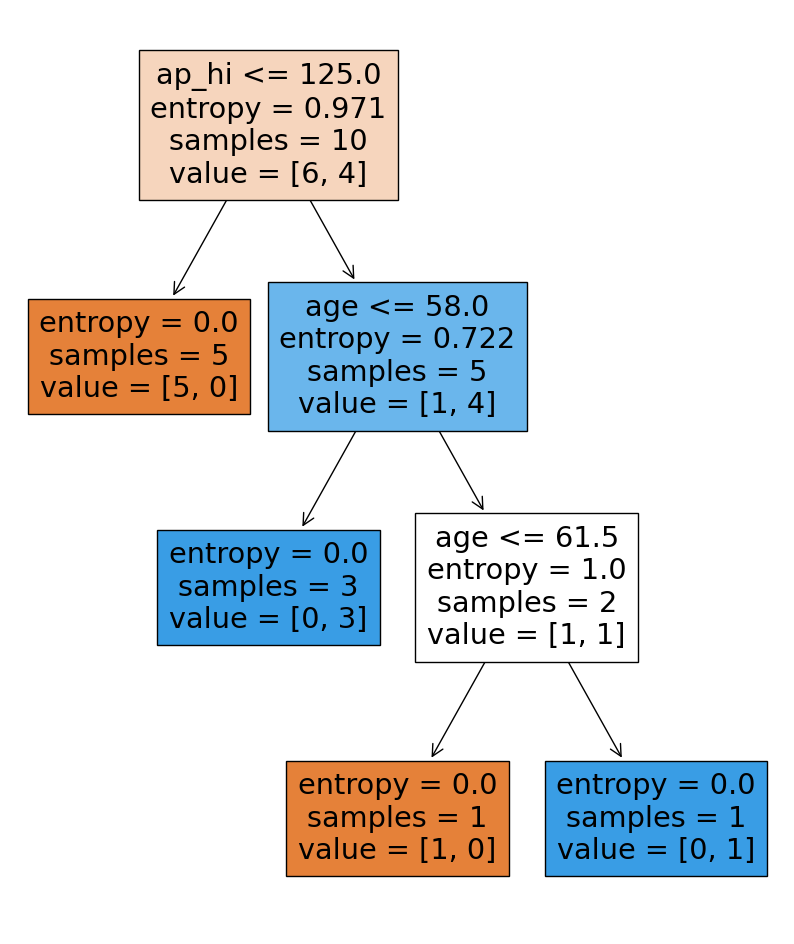

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X, y)

plt.figure(figsize=(10, 12))
plot_tree(tree, feature_names=features, filled=True);

#2. Решающие деревья для решения задач регрессии

## Получение данных

Будем работать с набором данных для задачи регрессии (целевая переменная - стоимость дома) `california_housing`, который можно получить из стандартных датасетов в `sklearn'e`.

После `fetch_california_housing()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [ ]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Чтобы более наглядно смотреть, как обучается дерево решений возьмем только 5 объектов.

In [ ]:
features = ['HouseAge', 'Population']

In [ ]:
df = df[features + ['target']]
df = df.head(5)
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [ ]:
X = df[features]
y = df['target']

## Обучение дерева решений

Инициализируем дерево решений для задачи регрессии и обучим на признаках (`X`) и целевой переменной (`y`). По признакам модель будет запоминать закономерности, которые ведут к изменению стоимости дома.

In [ ]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(random_state=1)
tree.fit(X, y)

DecisionTreeRegressor(random_state=1)

Теперь визуализируем наше обученное дерево решений. Узлы (ноды), где находится вопрос - называются вершинами, а где вопросов больше нет - это лист. В каждом узле хранятся объекты и предсказания, которые строятся как среднее по всем объектам, которые попали в этот узел.

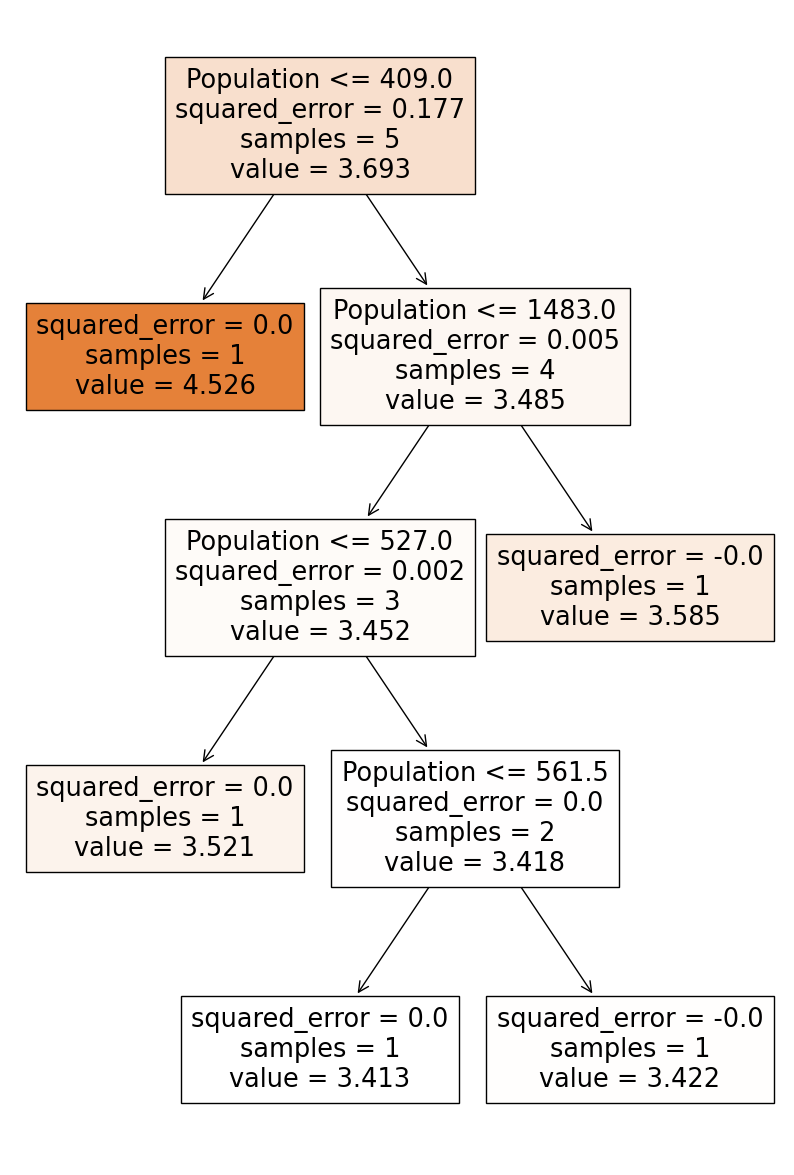

In [ ]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 15))
plot_tree(tree, feature_names=features, filled=True);

Как же оно обучилось?

Чтобы наилучшим образом предсказывать стоимость дома, надо ввести функцию потерь - ошибка, которую мы будем стараться минимизировать. Ведь хочется, чтобы предсказанная стоимость дома совпадала с истинным значением.

In [ ]:
y

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

### Средне-квадратичная ошибка

 Возьмем среднеквадратичную ошибку (mean squared error).

 $MSE = \frac{1}{n}\sum_i^n{(y_{true} - y_{pred})^2}$

In [ ]:
import numpy as np


def mse(true, pred):
    return np.mean(np.square(true - pred))

### Population <= 409

Наше обученное дерево решило, что самый лучший первый вопрос к нашим данным - это Population <= 409. В этом случае происходит разбиение на две выборки:   

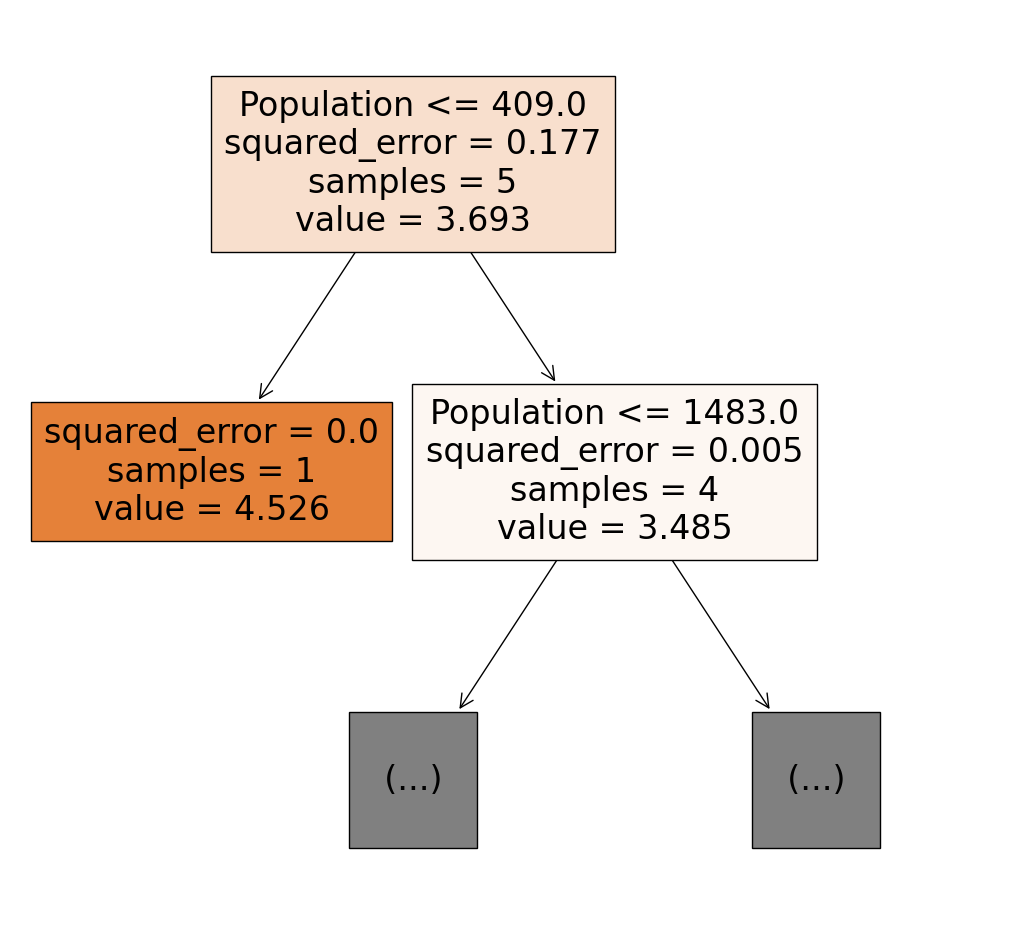

In [ ]:
plt.figure(figsize=(13, 12))
plot_tree(tree, feature_names=features, filled = True, max_depth=1);

In [ ]:
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


В одной 1 объект, который удовлетворяет этому условию.

In [ ]:
df[df.Population <= 409]

,HouseAge,Population,target
0,41.0,322.0,4.526


Во второй 4 объекта, которые не следует этому условию.

In [ ]:
df[~(df.Population <= 409)]

,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


#### Корневой узел

Теперь можем посчитать среднеквадратичную ошибку в корневом узле, где находятся все 5 объектов. Считаем, что предсказание стоимости дома в этом узле - это среднее всех целевых переменных объектов, которые в узле находятся.

$$pred = \frac{4.526 + 3.585 + 3.521 + 3.413 + 3.422}{5} = 3.6934$$


In [ ]:
print(f"Среднее предсказание в корневом узле равно {df['target'].mean()}")

Среднее предсказание в корневом узле равно 3.6934000000000005


$$MSE = \frac{(4.526 - 3.6934)^2 + (3.585- 3.6934)^2 + (3.521-3.6934)^2 + (3.413-3.6934)^2 + (3.422-3.6934)^2}{5} = 0.17739$$


In [ ]:
mse_root = mse(df['target'], df['target'].mean())
print(f"Среднеквадратичная ошибка в корневом узле равна {mse_root}")

Среднеквадратичная ошибка в корневом узле равна 0.17739543999999993


И ошибка, и среднее значение целевой переменной совпали с теми, что визуализировались на дереве решений в самом перевом узле.

Посмотрим, насколько уменьшается ошибка, если данным задать вопрос Population <= 409.

In [ ]:
df_left = df[df.Population <= 409]
df_left

,HouseAge,Population,target
0,41.0,322.0,4.526


#### Левая выборка

В первой выборке 1 объект и его среднеквадратичная ошибка равна:


$$pred = \frac{4.526}{1} = 4.526$$


$$MSE = \frac{(4.526 - 4.526)^2}{1} = 0$$



In [ ]:
print(f"Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно {df_left['target'].mean()}")

mse_left = mse(df_left['target'], df_left['target'].mean())
print(f"Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна {mse_left}")

Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно 4.526
Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна 0.0


#### Правая выборка

Во второй правой выборке 4 объекта и их среднеквадратичная ошибка равна:

$$pred = \frac{3.585 + 3.521 + 3.413 + 3.422}{4} = 3.4852$$



$$MSE = \frac{(3.585- 3.4852)^2 + (3.521-3.4852)^2 + (3.413-3.4852)^2 + (3.422-3.4852)^2}{4} = 0.00511$$


In [ ]:
df_right = df[~(df.Population <= 409)]
df_right

,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [ ]:
print(f"Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно {df_right['target'].mean()}")

mse_right = mse(df_right['target'], df_right['target'].mean())
print(f"Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна {mse_right}")

Среднее предсказание в левой подвыборке после вопроса Population <= 409 равно 3.48525
Среднеквадратичная ошибка в левой подвыборке после вопроса Population <= 409 равна 0.005112187499999999


#### Прирост информации

Теперь хочется в целом понять, насколько данное разбиение помогает нам уменьшить ошибку, для этого нужно ввести понятие "прирост информации" (information gain). Он считается, как

$$IG = MSE_{root} - (\frac{n_{left}}{n}MSE_{left} + \frac{n_{right}}{n}MSE_{right})$$
где $n_{left}$ - это количество объектов в левой ветке, $n_{right}$ - это количество объектов в правой ветке, а $n$ - количество объектов в корневом узле.


$$IG = 0.17739 - (\frac{1}{5} * 0 + \frac{4}{5} * 0.00511) = 0.1733$$

In [ ]:
n_left = df_left.shape[0]
n_right = df_right.shape[0]
n = df.shape[0]

ig = mse_root - ((n_left / n) * mse_left + (n_right / n) * mse_right)
ig

0.17330568999999993

### HouseAge <= 50

А теперь попробуем другой вопрос, не тот, который выбрался самым лучшим по мнению этого дерева решений. К примеру, возьмем вопрос HouseAge <= 50.

В левой ветке 1 объект, который удовлетворяет этому условию.

In [ ]:
df[df.HouseAge <= 50]

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585


В правой ветке 3 объекта, которые не следует этому условию.

In [ ]:
df[~(df.HouseAge <= 50)]

,HouseAge,Population,target
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


#### Корневой узел

Считаем среднеквадратичную ошибку в корневом узле, где находятся все 5 объектов, она будет такой же, как мы получали выше, потому что объекты в корне никак не меняются.

$$pred = \frac{4.526 + 3.585 + 3.521 + 3.413 + 3.422}{5} = 3.6934$$


$$MSE = \frac{(4.526 - 3.6934)^2 + (3.585- 3.6934)^2 + (3.521-3.6934)^2 + (3.413-3.6934)^2 + (3.422-3.6934)^2}{5} = 0.17739$$


In [ ]:
print(f"Среднее предсказание в корневом узле равно {df['target'].mean()}")

Среднее предсказание в корневом узле равно 3.6934000000000005


In [ ]:
mse_root = mse(df['target'], df['target'].mean())
print(f"Среднеквадратичная ошибка в корневом узле равна {mse_root}")

Среднеквадратичная ошибка в корневом узле равна 0.17739543999999993


#### Левая выборка

Глянем на то, насколько уменьшается ошибка, если задаем вопрос HouseAge <= 50.

In [ ]:
df_left = df[df.HouseAge <= 50]
df_left

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585


$$pred = \frac{4.526 + 3.585}{2} = 4.0555$$



$$MSE = \frac{(3.585- 4.0555)^2 + (3.521-4.0555)^2}{2} = 0.2213$$


In [ ]:
print(f"Среднее предсказание в левой подвыборке после вопроса HouseAge <= 50 равно {df_left['target'].mean()}")

mse_left = mse(df_left['target'], df_left['target'].mean())
print(f"Среднеквадратичная ошибка в левой подвыборке после вопроса HouseAge <= 50 равна {mse_left}")

Среднее предсказание в левой подвыборке после вопроса HouseAge <= 50 равно 4.0555
Среднеквадратичная ошибка в левой подвыборке после вопроса HouseAge <= 50 равна 0.22137024999999994


#### Правая выборка

In [ ]:
df_right = df[~(df.HouseAge <= 50)]
df_right

,HouseAge,Population,target
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


$$pred = \frac{3.521 + 3.413 + 3.422}{3} = 3.452$$



$$MSE = \frac{(3.521-3.4852)^2 + (3.413-3.4852)^2 + (3.422-3.4852)^2}{3} = 0.00239$$




In [ ]:
print(f"Среднее предсказание в правой подвыборке после вопроса HouseAge <= 50 равно {df_right['target'].mean()}")

mse_right = mse(df_right['target'], df_right['target'].mean())
print(f"Среднеквадратичная ошибка в правой подвыборке после вопроса HouseAge <= 50 равна {mse_right}")

Среднее предсказание в правой подвыборке после вопроса HouseAge <= 50 равно 3.452
Среднеквадратичная ошибка в правой подвыборке после вопроса HouseAge <= 50 равна 0.0023939999999999977


#### Прирост информации

И считаем прирост информации, чтобы объединить 3 значения среднеквадратичной ошибки в одно общее.


$$IG = 0.17739 - (\frac{2}{5} * 0.2213 + \frac{3}{5} * 0.00239) = 0.08743$$

In [ ]:
n_left = df_left.shape[0]
n_right = df_right.shape[0]
n = df.shape[0]

ig = mse_root - ((n_left / n) * mse_left + (n_right / n) * mse_right)
ig

0.08741093999999995

$$IG_{\text{population}} = 0.1733$$
$$IG_{\text{house_age}} = 0.08743$$
$$IG_{\text{population}} > IG_{\text{house_age}}$$

Прирост информации при вопросе HouseAge <= 50 получился меньше, чем при вопросе Population <= 409, значет выгодней задавать вопрос, связанный с населением.   


## Процесс построения дерева

Продемонстрируем процесс обучения дерева решения.

Дерево, чтобы получить самый полезный вопрос, проходится по всем признакам и по всем уникальным значениям в нём (либо по среднем между значениями) и выбирает тот вопрос, у которого прирост информации получился выше.

In [ ]:
df

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


Сначала проход будет сделан по признаку HouseAge, найдутся все значения, при которых получаются уникальные разбиения.

In [ ]:
split_values = sorted(df.HouseAge.unique())
split_values

[21.0, 41.0, 52.0]

Можем сделать два уникальных разбиения:
1. с вопросом HouseAge <= 21

In [ ]:
display(df[(df['HouseAge'] <= 21)], df[~(df['HouseAge'] <= 21)])

,HouseAge,Population,target
1,21.0,2401.0,3.585


,HouseAge,Population,target
0,41.0,322.0,4.526
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


2. с вопросом HouseAge <= 41

In [ ]:
display(df[(df['HouseAge'] <= 41)], df[~(df['HouseAge'] <= 41)])

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585


,HouseAge,Population,target
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


Вопрос HouseAge <= 52 не имеет смысла, т.к. все объекты оказываются в левой ветке.

In [ ]:
display(df[(df['HouseAge'] <= 52)], df[~(df['HouseAge'] <= 52)])

,HouseAge,Population,target
0,41.0,322.0,4.526
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


,HouseAge,Population,target


In [ ]:
def get_information_gain(df, feature, split):
    df_left, df_right = df[(df[feature] <= split)], df[~(df[feature] <= split)]

    n_left = df_left.shape[0]
    n_right = df_right.shape[0]
    n = df.shape[0]

    mse_root = mse(df['target'], df['target'].mean())
    mse_left = mse(df_left['target'], df_left['target'].mean())
    mse_right = mse(df_right['target'], df_right['target'].mean())

    ig = mse_root - ((n_left / n) * mse_left + (n_right / n) * mse_right)
    print(f'Прирост информации при вопросе {feature} <= {split} равен {ig}')
    return ig

In [ ]:
information_gains = {}

In [ ]:
feature = 'HouseAge'
for split in split_values[:-1]:
    information_gains[f'{feature} <= {split}'] = get_information_gain(df, feature, split)

Прирост информации при вопросе HouseAge <= 21.0 равен 0.0029376399999999636
Прирост информации при вопросе HouseAge <= 41.0 равен 0.08741093999999995


In [ ]:
split_values = sorted(df.Population.unique())
split_values

[322.0, 496.0, 558.0, 565.0, 2401.0]

In [ ]:
feature = 'Population'
for split in split_values[:-1]:
    information_gains[f'{feature} <= {split}'] = get_information_gain(df, feature, split)

Прирост информации при вопросе Population <= 322.0 равен 0.17330568999999993
Прирост информации при вопросе Population <= 496.0 равен 0.07264400666666662
Прирост информации при вопросе Population <= 558.0 равен 0.024041339999999994
Прирост информации при вопросе Population <= 565.0 равен 0.0029376399999999636


Теперь найдем максимальный прирост информации для нашего первого вопроса.

In [ ]:
max(information_gains, key=information_gains.get)

'Population <= 322.0'

Получилось, что самый полезный вопрос - Population <= 322.

По поводу того, что наш вопрос не совпал с вопросом из дерева с sklearn:   
Мы брали уникальные значения признака, как пороговые значения, а в sklearn'e берутся средние арифметические двух значений, как раз вопрос Population <= 409 получился от значений 322 и 496 (т.к. $\frac{322 + 496}{2} = 409$), но при этом разбиения получаются одинаковые:

In [ ]:
display(df[(df['Population'] <= 409)], df[~(df['Population'] <= 409)])

,HouseAge,Population,target
0,41.0,322.0,4.526


,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


In [ ]:
display(df[(df['Population'] <= 322)], df[~(df['Population'] <= 322)])

,HouseAge,Population,target
0,41.0,322.0,4.526


,HouseAge,Population,target
1,21.0,2401.0,3.585
2,52.0,496.0,3.521
3,52.0,558.0,3.413
4,52.0,565.0,3.422


# 3. Критерии останова

### Получение данных

После `fetch_california_housing()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [ ]:
df_full = pd.DataFrame(X, columns=features)
df_full['target'] = y

df_full.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Для простоты понимания ограничимся десятью объектами из выборки.

In [ ]:
df = df_full.iloc[:10]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


Разобьем выборку на две: обучающую и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8, 8), (8,), (2, 8), (2,))

### Обучение дерева решений

Инициализируем дерево решений для задачи регрессии и обучим на обучающей выборке (`X_train`) и целевой переменной для обучающих объектов (`y_train`).

In [ ]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

Теперь визуализируем наше обученное дерево решений. Оно получилось не очень большим. Получилось 7 узлов с вопросами и 8 листов с предсказаниями, кстати именно столько объектов и было в обучающей выборке.

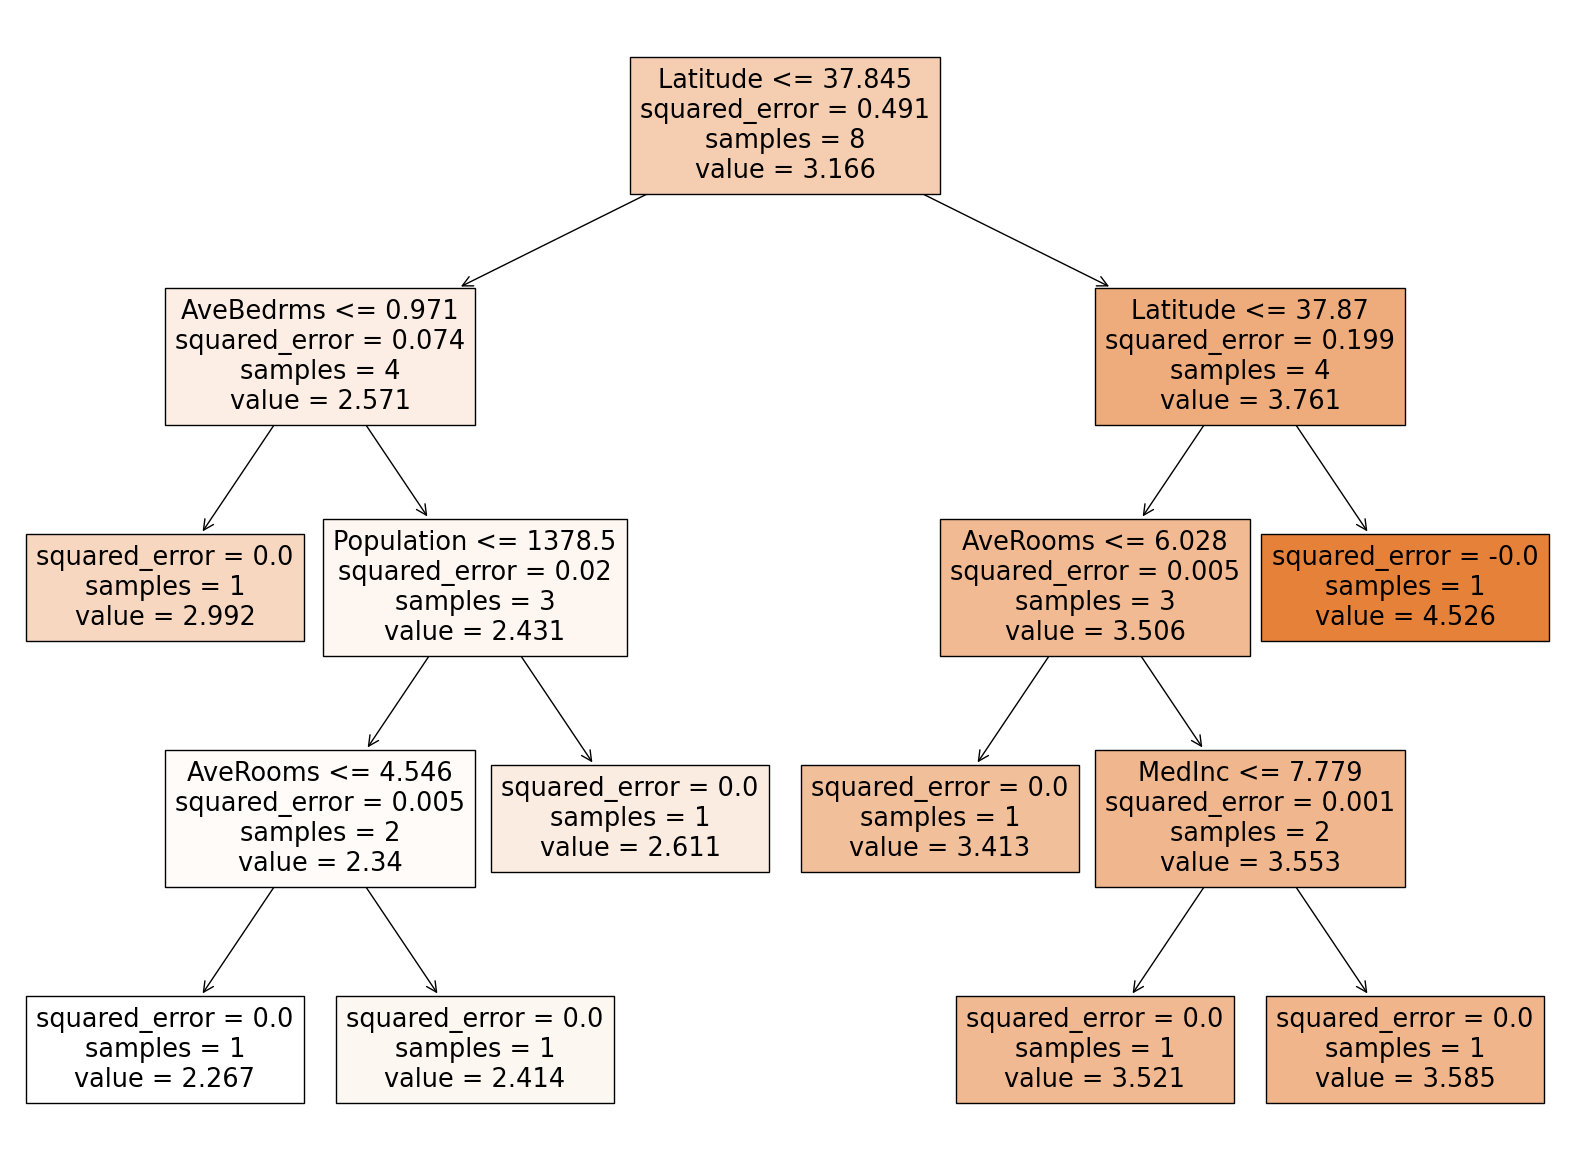

In [ ]:
from sklearn.tree import plot_tree


plt.figure(figsize=(20, 15))
plot_tree(tree, feature_names=features, filled=True);

Узнаем, насколько дерево решений обучилось хорошо, для этого сделаем предсказания моделью для обучающей выборке и для тестовой, а затем посчитаем метрику качества средне-квадратичную ошибку.

In [ ]:
from sklearn.metrics import mean_squared_error

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.00
MSE на тесте 0.26


Метрика на обучении получилась очень маленькая, равная нулю, это говорит нам о том, что во все истинные значения наша модель идеально попала.   
Все значения целевого признака из обучения полностью совпадают с предсказанными значениями:

In [ ]:
pd.DataFrame({
    'true': y_train,
    'pred': pred_train
})

,true,pred
1,3.585,3.585
2,3.521,3.521
9,2.611,2.611
6,2.992,2.992
7,2.414,2.414
0,4.526,4.526
3,3.413,3.413
8,2.267,2.267


На тестовой выборке картина далеко не такая идеальная:

In [ ]:
pd.DataFrame({
    'true': y_test,
    'pred': pred_test
})

,true,pred
5,2.697,3.413
4,3.422,3.521


На тесте отклонения истинных значений от предсказанных больше - это и отображается в метрике MSE на тестовых данных.

## Зачем нужны критерии останова?

А вот мы плавно и подошли к тому, зачем же нужны критерии останова. Чтобы бороться с переобучением, но давайте для начала вспомним, что же это за зверь.

Когда есть разница между метриками качества на обучении и тесте, это говорит о **переобучении** - явление, когда построенная модель хорошо объясняет примеры из обучающей выборки, но относительно плохо работает на примерах, не участвовавших в обучении (на примерах из тестовой выборки).

Переобучение визуально показано на картинке ниже, в этом случае модель слишком хорошо запомнила обучающую выборку, подогналась под примеры и не стала изучать общую закономерность в данных.

<img src='https://drive.google.com/uc?export=view&id=189kw3wJRkeZYEZDvrRZsHiNb-7Sgf4Cj'>

Как раз деревья решений страдают от переобучения чаще, модель засчет большого количества вопросов может повторять довольно сложные закономерности, иногда настолько хорошо, что попросту запоминает всё, что видела в обучающем наборе данных.

## Какие есть критерии останова у дерева решений?

Чтобы посмотреть, какие критерии останова есть у модели, можно посмотреть на её инициализацию и вывести список аргументов.

In [ ]:
?DecisionTreeRegressor()

Object `DecisionTreeRegressor()` not found.


Здесь есть как аргументы, относящиеся к особенностям построения дерева, к примеру `criterion` - функция потерь, с помощью которой ищется самое лучшее разбиение или же `random_state`, который отвечает за фиксацию псевдорандома.

Так и есть более интересующие нас аргументы, которые и помогают бороться с переобучением. Из основных:
- `max_depth`
- `min_samples_leaf`
- `max_leaf_nodes`

Остальные критерии останова можете поизучать сами, или если интересно послушать моё объяснение, то можете написать об этом в комментариях.

### max_depth
Посмотрим на эти критерии по очереди. Первый `max_depth`.

Наши деревья решений очень любят задавать вопросы к данным и они настолько сильно этим увлекаются, что порой перебарщивают и по итогу становятся очень сложными и ветвистыми, критерий останова по максимальной глубине дерева призван помочь с этим, засчет ограничения уровней с вопросами.

Когда мы обучили дерево решений первый раз, то не писали агрумент max_depth, в этом случае глубина может быть сколь угодно большой. В этом случае глубина вышла 4. При этом max_depth отвечает именно за уровни с вопросами, а не их количество.

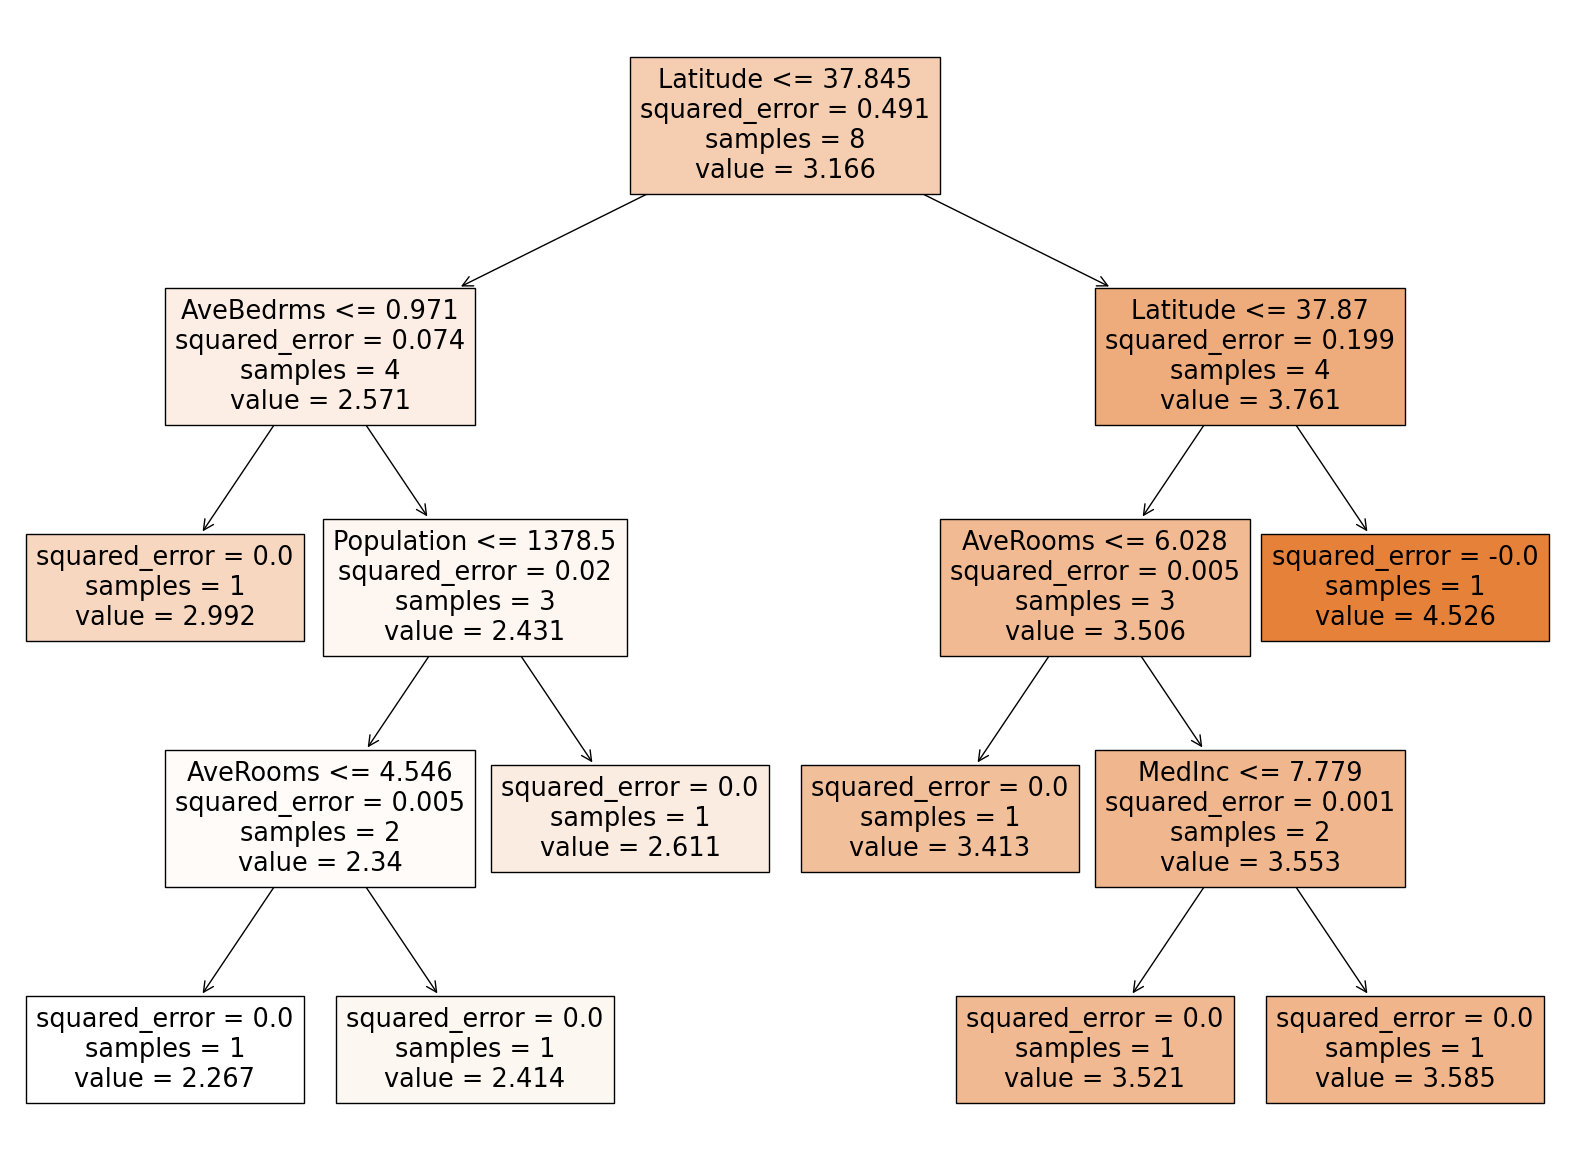

In [ ]:
plt.figure(figsize=(20, 15))
plot_tree(tree, feature_names=features, filled=True);

Давайте попытаемся снизить переобучение с помощью max_depth, поставим ему значение поменьше, тем самым запретим дереву быть слишком сложным.

Поставим к примеру значение равное 2. Теперь видим, что есть только два уровня с вопросами, вопросов 3 штуки, а листев с предсказаниями 4.

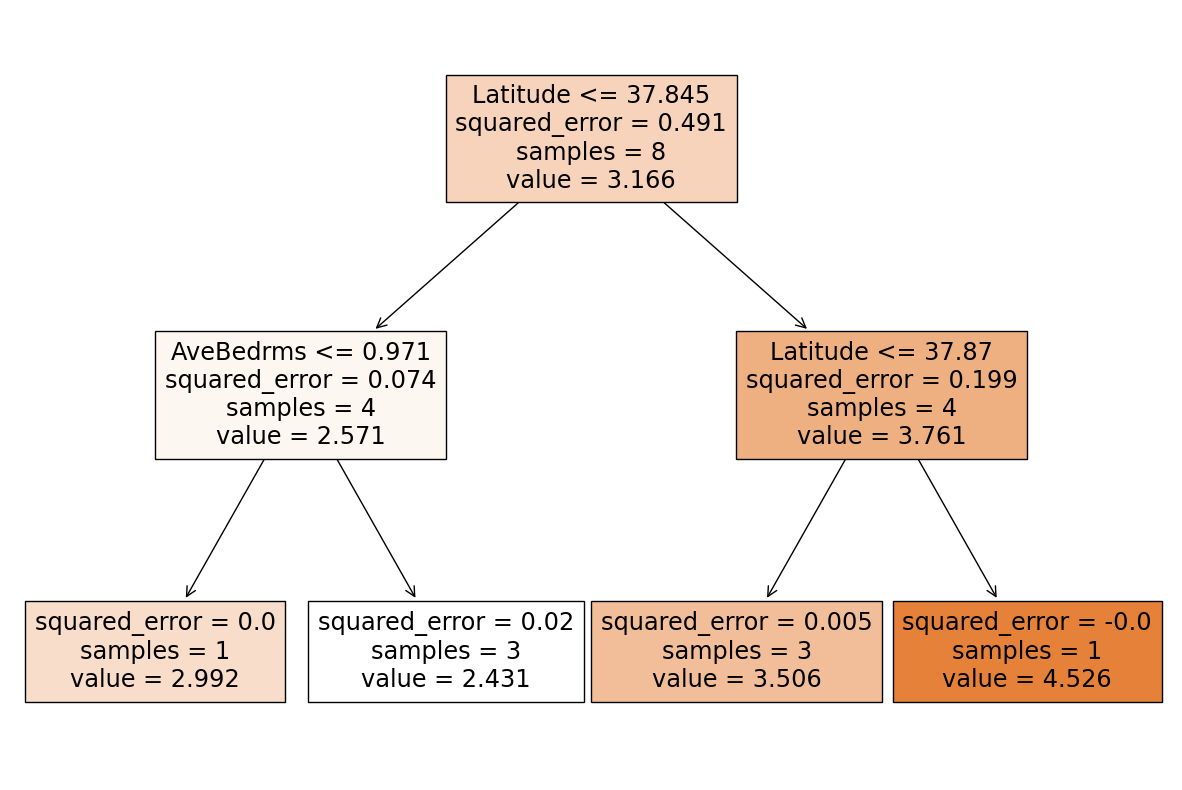

In [ ]:
tree = DecisionTreeRegressor(random_state=1, max_depth=2)
tree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=features, filled=True);

### min_samples_leaf

Едем дальше и сейчас смотрим на критерий останова `min_samples_leaf` - минимальное количество объектов в одном листе.

С чем нам поможет данный критерий? Снова вспомним, что наши деревья решений любители допрашивать данные и они очень любят определенность, поэтому они могут докапаться до истины посредством отделения каждого объекта в индивидуальный лист, критерий останова по минимальному количеству объектов в одном листе помогает не допускать ужасного сценария переобучения.

По умолчанию `min_samples_leaf` равен 1, а значит мы позволяем дереву строить листья с одним объектом в листе, из-за этого получаем идеальную подгонку обучающей выборки и далеко неидеальную картину на тесте.

Изменим аргумент на значение 2, чтобы дерево пыталось строить более обобщенную модель.

Видим, что теперь samples в каждом конечном узле равно два, значит там находится по два объекта, как мы и просили у дерева.

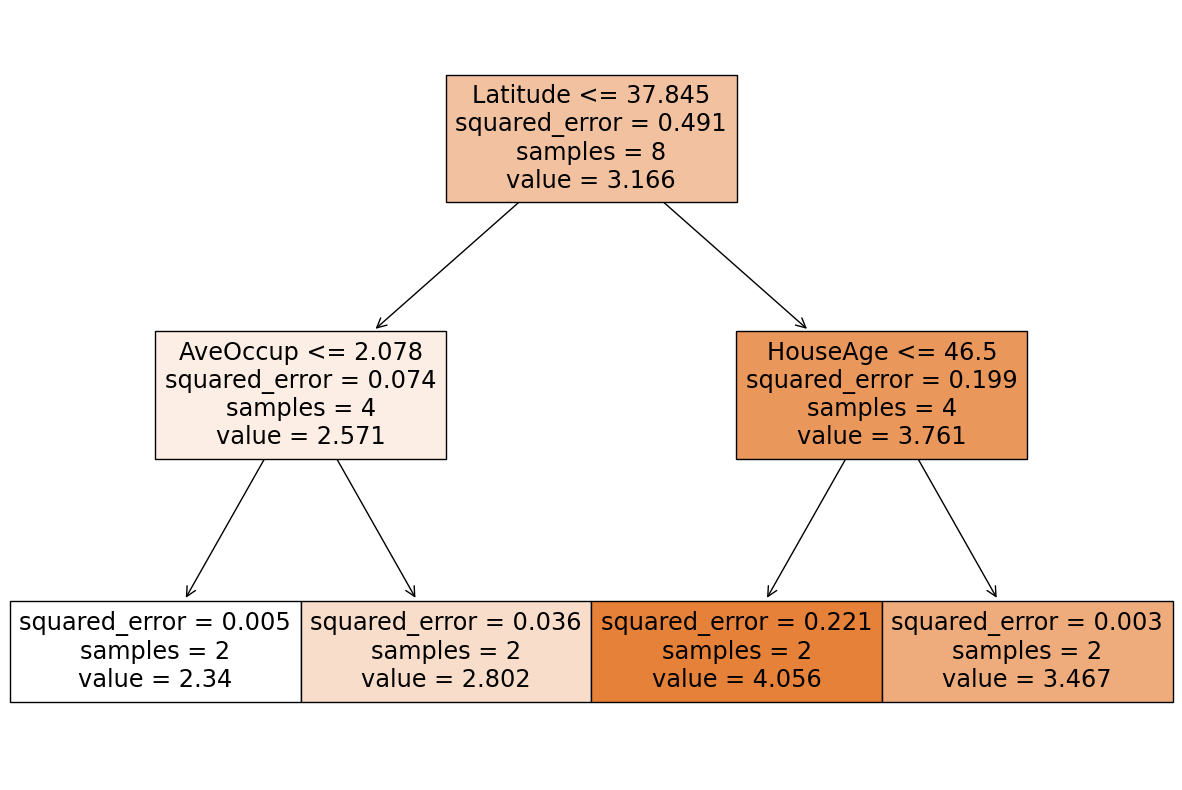

In [ ]:
tree = DecisionTreeRegressor(random_state=1, min_samples_leaf=2)
tree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=features, filled=True);

### max_leaf_nodes

И остается у нас на сегодня критерий останова `max_leaf_nodes` - максимальное количество листьев.

Чем больше листьев, тем больше переобучение, потому что модель более сложная.

По умолчанию `max_leaf_nodes` равен None, а значит ничем не ограничен и дерево будет строиться пока есть силы для подгонки.


В самом первом, самом переобученном дереве было 8 листьев, ровно столько же, сколько у нас есть объектов в обучении, сделаем количество листьев поменьше, чтобы и переобучения было поменьше.

И видим, что теперь количество листьев действительно равно 5.

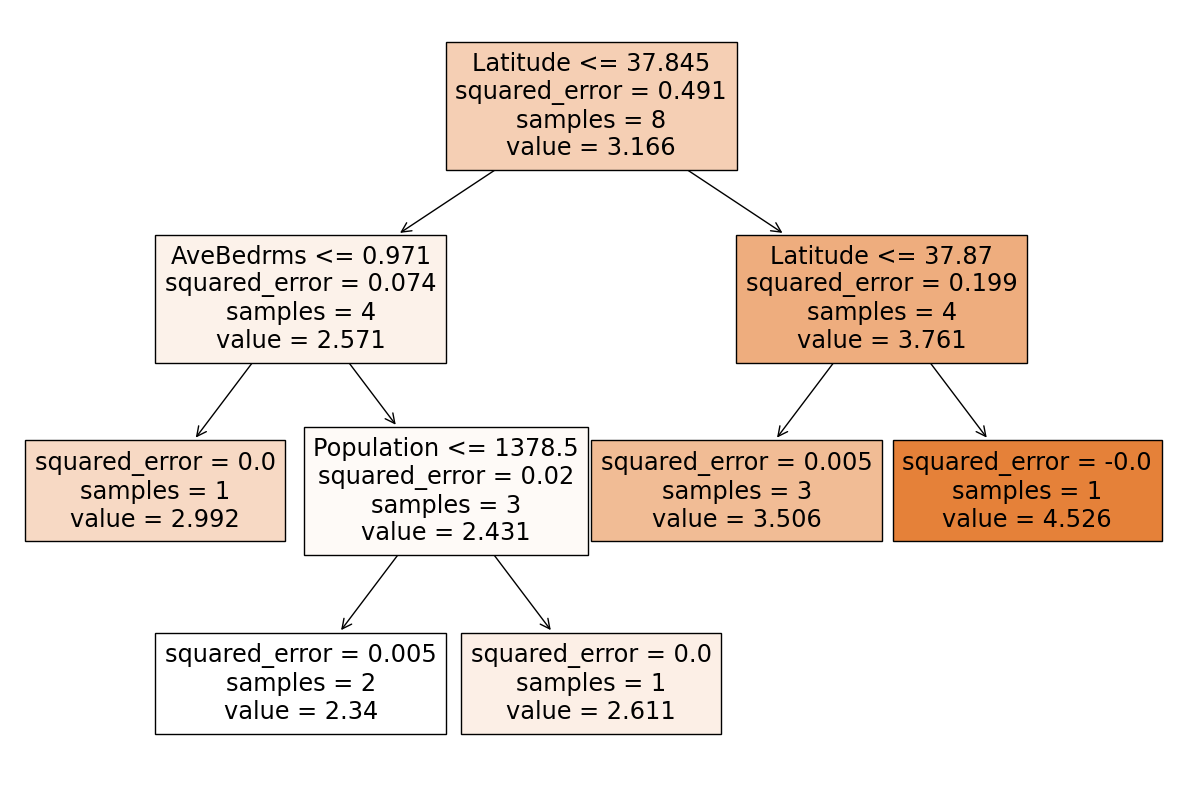

In [ ]:
tree = DecisionTreeRegressor(random_state=1, max_leaf_nodes=5)
tree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=features, filled=True);

## Как этим пользоваться?

Данные критерии конечно же можем использовать вместе для более высокого качества работы модели, да и по факту они все связаны между собой: чем меньше уровней с вопросами (`max_depth`), тем меньше вопросов и меньше листьев (`max_leaf_nodes`), тем больше количество объектов в одном листе (`min_samples_leaf`).

Давайте возьмем весь датасет и попытаемся подобрать самые лучшие параметры дерева решений.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_full[features],
    df_full['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

Пока обучимся на параметрах по умолчанию:
- `max_depth=None`
- `min_samples_leaf=1`
- `max_leaf_nodes=None`

In [ ]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

И естественно видим переобучение, метрика на обучении идеальная, мы каждый объект предсказали правильно, а вот на тесте совсем не симпатично. Будем исправлять.

In [ ]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.00
MSE на тесте 0.52


Т.к. пока вообще не знаем откуда стартовать, то давайте пойдем по порядку и поизменяем максимальную глубину, возьмем случайное число из головы и поставим.

Разница в метриках стала меньше, а значит переобучение тоже уменьшилось, плюс наша метрика на тесте стала лучше.

In [ ]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=15,
                             min_samples_leaf=1,
                             max_leaf_nodes=None)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.04
MSE на тесте 0.48


Давайте поиграемся с максимальным количеством листьев, поставим число 500, может повезет.

In [ ]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=15,
                             min_samples_leaf=1,
                             max_leaf_nodes=500)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.19
MSE на тесте 0.40


Вроде как повезло, тенденция отличная, переобучения меньше, а метрика на тесте всё улучшается.

Действуем дальше и можем изменить минимальное количество объектов в одном листе, сделаем его больше.

In [ ]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=15,
                             min_samples_leaf=10,
                             max_leaf_nodes=500)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.22
MSE на тесте 0.35


Пока мы делаем всё отлично. Остается дальше нащупывать дорогу и двигаться по ней.


In [ ]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=13,
                             min_samples_leaf=10,
                             max_leaf_nodes=500)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.23
MSE на тесте 0.36



Уменьшив max_depth с 15 до 13 мы потеряли более хорошую метрику на тесте, не есть хорошо, так что пробуем другое.

In [ ]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=14,
                             min_samples_leaf=10,
                             max_leaf_nodes=500)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.23
MSE на тесте 0.35


С `max_depth=14` вышло лучше.

И так можно делать очень долго, пока вы не будете довольны своей моделью.

Оптимальные метрики:

In [ ]:
tree = DecisionTreeRegressor(random_state=1,
                             max_depth=14,
                             min_samples_leaf=24,
                             max_leaf_nodes=400)
tree.fit(X_train, y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

print(f'MSE на обучении {mse_train:.2f}')
print(f'MSE на тесте {mse_test:.2f}')

MSE на обучении 0.28
MSE на тесте 0.34


Советую изменять только один параметр за раз и мониторить, что произошло, что поменялось:
- если стало хуже, нужно откатиться
- если стало лучше, вы сделали всё верно.

Нужно нащупывать границы в параметрах, когда модель начинает вести себя лучше и не переобучаться.

## Рекомендации по подбору критериев:

<table>

<tr>
<td>
Критерий останова
</td>

<td>
Смысл
</td>

<td>
Что делать, что бы<br> уменьшить переобучение
</td>


</tr>

<tr>
<td>
max_depth
</td>

<td>
<b>максимальное кол-во уровней с вопросами</b><br>
чем глубже дерево, тем оно сложнее
</td>

<td>
▼ уменьшать
</td>

</tr>

<tr>
<td>
min_samples_leaf

</td>

<td>
<b>минимальное кол-во объектов в одном листе</b><br>
если в листе один объект - это скорее всего<br> сложная модель с низким уровнем обощения
</td>

<td>
▲ увеличивать
</td>

</tr>

<tr>
<td>
max_leaf_nodes

</td>

<td>
<b>максимальное вол-во листьев</b><br>
чем больше листьев, тем больше вероятность<br> сделать индивидуальный лист для объекта
</td>

<td>
▼ уменьшать
</td>

</tr>


</table>